In [1]:
#import all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
##import the Sqllite libraries
import sqlite3

In [3]:
#create the connection to Sqllite3
cnx = sqlite3.connect("C:\\Users\\sridhar_marri\\Downloads\\soccer\\database.sqlite")

In [4]:
#read the players data fron database.sqlite and store it in Data frame.
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [5]:
#display the first five rows of data
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [7]:
#columns basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

In [8]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [13]:
#Handling Missing Data
#1.First check any missing data in the data set
df.isnull().any().any(), df.shape

(True, (183978, 42))

In [14]:
#now find how many data points in each column are null.
df.isnull().sum(axis=0)

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [15]:
#Fixing Null Values by Deleting Them
# Take initial # of rows
rows = df.shape[0]
print(rows)

183978


In [16]:
# Drop the NULL rows
df = df.dropna()

In [17]:
#after dropping the Null values and again check the no of rows present in the data set
rows = df.shape[0]
print(rows)

180354


In [18]:
#need to check again any null values are present in the data set
df.isnull().any().any(), df.shape

(False, (180354, 42))

In [32]:
#now define the feaures
feature_columns=['crossing', 'finishing', 'heading_accuracy',
                 'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
                 'long_passing', 'ball_control', 'acceleration', 'sprint_speed','agility', 
                 'reactions', 'balance', 'shot_power', 'jumping', 'stamina','strength', 
                 'long_shots', 'aggression', 'interceptions', 'positioning','vision',
                 'penalties', 'marking', 'standing_tackle', 'sliding_tackle','gk_diving', 'gk_handling', 
                 'gk_kicking', 'gk_positioning','gk_reflexes','potential']

data = df[feature_columns]

In [33]:
data.head()

,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,potential
0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,71.0
1,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,71.0
2,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,...,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,66.0
3,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,65.0
4,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,65.0


In [34]:
#define the independent and dependent variable
X = df[feature_columns]
y=df["overall_rating"]

In [35]:
X.head()

,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,potential
0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,71.0
1,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,71.0
2,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,...,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,66.0
3,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,65.0
4,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,65.0


In [36]:
y.head()

0    67.0
1    67.0
2    62.0
3    61.0
4    61.0
Name: overall_rating, dtype: float64

In [37]:
#need to check correleation with independnt and dependent variables
for f in feature_columns:
    related = y.corr(X[f])
    print("%s: %f" % (f,related))

crossing: 0.357320
finishing: 0.330079
heading_accuracy: 0.313324
short_passing: 0.458243
volleys: 0.361739
dribbling: 0.354191
curve: 0.357566
free_kick_accuracy: 0.349800
long_passing: 0.434525
ball_control: 0.443991
acceleration: 0.243998
sprint_speed: 0.253048
agility: 0.239963
reactions: 0.771856
balance: 0.160211
shot_power: 0.428053
jumping: 0.258978
stamina: 0.325606
strength: 0.315684
long_shots: 0.392668
aggression: 0.322782
interceptions: 0.249094
positioning: 0.368978
vision: 0.431493
penalties: 0.392715
marking: 0.132185
standing_tackle: 0.163986
sliding_tackle: 0.128054
gk_diving: 0.027675
gk_handling: 0.006717
gk_kicking: 0.028799
gk_positioning: 0.008029
gk_reflexes: 0.007804
potential: 0.765435


## As per the above analysis short_passing ,ball_control,vision have higher corelation with overall_rating

In [45]:
#plotting the graph using matplotlib library
def plot_dataframe(X, y_label):  
    color='coral'
    fig = plt.gcf()
    fig.set_size_inches(20, 12)
    plt.ylabel(y_label)

    ax = plotDf.correlation.plot(linewidth=3.3, color=color)
    ax.set_xticks(plotDf.index)
    ax.set_xticklabels(plotDf.attributes, rotation=75); #Notice the ; (remove it and see what happens !)
    plt.show()

In [46]:
correlations = [ y.corr(X[f]) for f in feature_columns ]

In [47]:
plotDf = pd.DataFrame({'attributes': feature_columns, 'correlation': correlations}) 

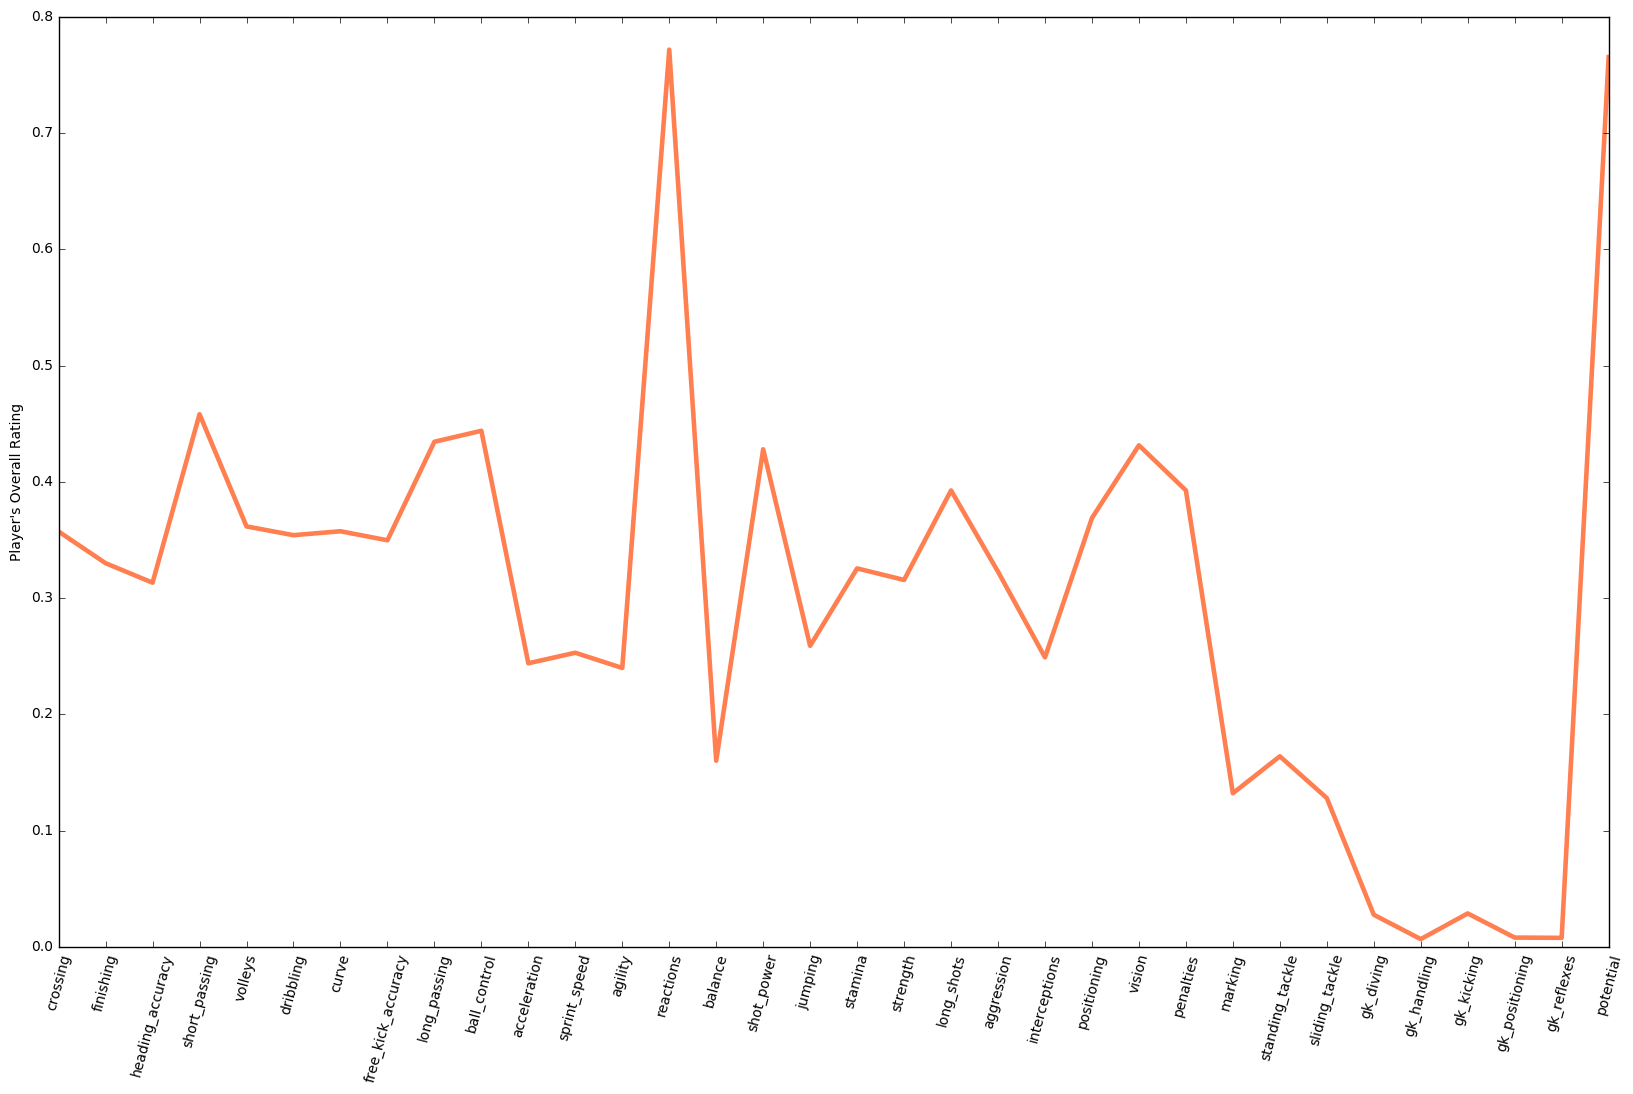

In [48]:
#plot the graph
    
plot_dataframe(plotDf, 'Player\'s Overall Rating')

In [49]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [50]:
#standarize all the values in the feautes i.e # Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test= sc.transform(X_test)  

In [51]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
# Predicting the Test set results
y_predict = regressor.predict(X_test)

In [56]:
print('Coefficients: \n',regressor.coef_)

Coefficients: 
 [ 0.39456648  0.23959378  1.14438902  0.71600175  0.074594   -0.23140155
  0.2110157   0.22249867  0.10649741  2.04001039  0.08110143  0.11343461
 -0.11042355  1.92369046  0.09982439  0.26208816  0.17700792 -0.07098131
  0.74197141 -0.24141387  0.33581266  0.24030081 -0.20096862 -0.03320184
  0.22063513  0.68113393  0.06984685 -0.6104115   2.77988134  0.53312903
 -0.71230568  0.90318142  0.38027803  2.48961902]


In [57]:
#intercept
regressor.intercept_

68.630282153822691

In [59]:
#check the mean square value
from sklearn import metrics
mse=metrics.mean_squared_error(y_test,y_predict)
print(mse)

7.7290000969


In [60]:
#RMSE
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

RMSE:  2.780107929


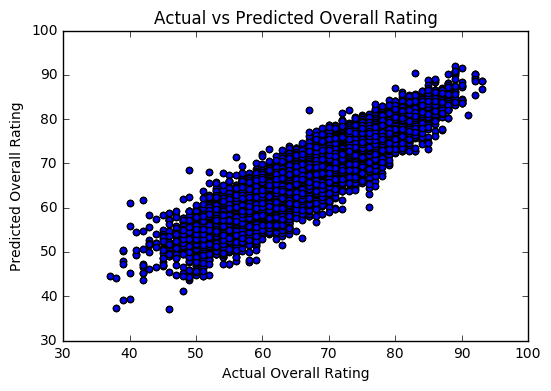

In [62]:
#ploter the scatter
plt.scatter(y_test,y_predict)
plt.xlabel('Actual Overall Rating')
plt.ylabel('Predicted Overall Rating')
plt.title( "Actual vs Predicted Overall Rating")
plt.show()

In [63]:
#Let's check the model score of accuracy.
regressor.score(X_test, y_test)

0.84169450401198753

## model can predict accuracy 84%

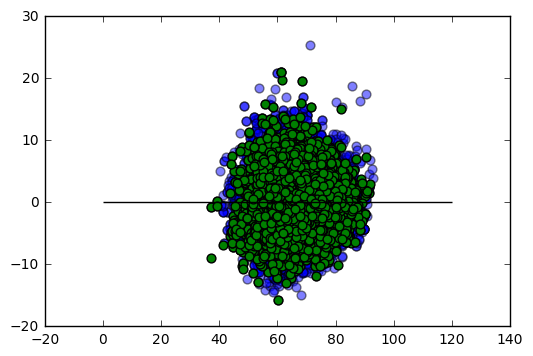

In [66]:
# plot
plt.scatter(regressor.predict(X_train),regressor.predict(X_train) - y_train,c='b',   # c= color blue
           s=40, alpha=0.5)

plt.scatter(regressor.predict(X_test),regressor.predict(X_test) - y_test, c='g', s=40)
plt.hlines(y=0,xmin=0,xmax=120)      # Horizontal line
plt.show()

In [67]:
#Building the optimal model using Backward Elimination
import statsmodels.formula.api as sm
X=np.append(arr=np.ones((X.shape[0],1)).astype(int),values=X,axis=1)

In [78]:
X_opt=X

In [80]:
regressor_OLS=sm.OLS(endog=y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_rating   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                 2.820e+04
Date:                Tue, 28 Aug 2018   Prob (F-statistic):               0.00
Time:                        01:45:15   Log-Likelihood:            -4.4136e+05
No. Observations:              180354   AIC:                         8.828e+05
Df Residuals:                  180319   BIC:                         8.831e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -3.6097      0.094    -38.285      0.000        -3.795    -3.425
x1             0.0222      0.001     26.476      0.000         0.021     0.024
x2             0.0117      0.001     12.651      0.000         0.010     0.014
x3             0.0698      0.001     84.979      0.000         0.068     0.071
x4             0.0501      0.001     36.184      0.000         0.047     0.053
x5             0.0043      0.001      5.151      0.000         0.003     0.006
x6            -0.0130      0.001    -11.157      0.000        -0.015    -0.011
x7             0.0117      0.001     14.531      0.000         0.010     0.013
x8             0.0126      0.001     17.633      0.000         0.011     0.014
x9             0.0073      0.001      7.648      0.000         0.005     0.009
x10            0.1349      0.002     84.652      0.000         0.132     0.138
x11            0.0067      0.001      4.806      0.000         0.004     0.009
x12            0.0089      0.001      6.777      0.000         0.006     0.011
x13           -0.0086      0.001     -8.466      0.000        -0.011    -0.007
x14            0.2103      0.001    193.160      0.000         0.208     0.212
x15            0.0082      0.001     10.424      0.000         0.007     0.010
x16            0.0168      0.001     19.043      0.000         0.015     0.019
x17            0.0157      0.001     21.505      0.000         0.014     0.017
x18           -0.0052      0.001     -6.361      0.000        -0.007    -0.004
x19            0.0614      0.001     72.918      0.000         0.060     0.063
x20           -0.0135      0.001    -14.691      0.000        -0.015    -0.012
x21            0.0201      0.001     29.179      0.000         0.019     0.021
x22            0.0126      0.001     17.049      0.000         0.011     0.014
x23           -0.0107      0.001    -13.478      0.000        -0.012    -0.009
x24           -0.0020      0.001     -2.324      0.020        -0.004    -0.000
x25            0.0143      0.001     19.061      0.000         0.013     0.016
x26            0.0325      0.001     28.820      0.000         0.030     0.035
x27            0.0032      0.001      2.424      0.015         0.001     0.006
x28           -0.0286      0.001    -25.856      0.000        -0.031    -0.026
x29            0.1631      0.001    110.924      0.000         0.160     0.166
x30            0.0335      0.002     17.383      0.000         0.030     0.037
x31           -0.0340      0.001    -54.153      0.000        -0.035    -0.033
x32            0.0558      0.002     29.084      0.000         0.052     0.060
x33            0.0247      0.002     13.126      0.000         0.021     0.028
x34            0.3779      0.001    257.813      0.000         0.375     0.381
==============================================================================
Om

## from above analysis all the features are play main role in calculating overall rating of the player i.e all the features are very important in calculating the Overall Rating 
